<a href="https://colab.research.google.com/github/ArzuTagi/Capstone_Project/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [69]:
train_df=pd.read_csv('train.csv')

In [63]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df=pd.read_csv('test.csv')
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#EDA, Data preprocessing & Feature Engineering
#In our case we are required create model with dependent variable: "Survived" and independent variable such as "Sex" and "Pclass". That is why we are carry out our EDA on these variables. 

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


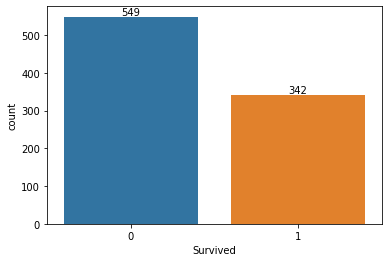

In [15]:
ax=sns.countplot(data=train_df, x ="Survived")
abs_values = train_df['Survived'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()


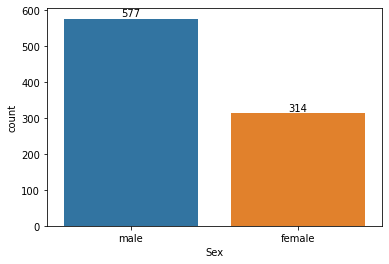

In [16]:
ax = sns.countplot(data=train_df, x='Sex')
abs_values = train_df['Sex'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

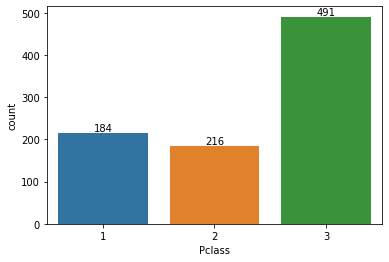

In [17]:
ax = sns.countplot(data=train_df, x='Pclass')
abs_values = train_df['Pclass'].value_counts(ascending=True).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

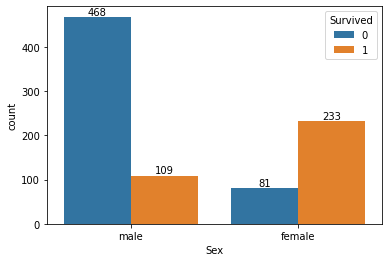

In [18]:
ax = sns.countplot(data=train_df, x='Sex', hue='Survived')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

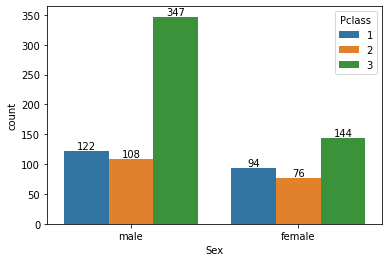

In [19]:
ax = sns.countplot(data=train_df, x='Sex', hue='Pclass')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

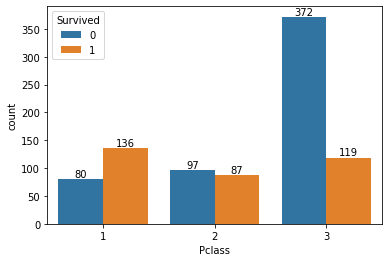

In [20]:
ax = sns.countplot(data=train_df, x='Pclass', hue='Survived')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [21]:
train_df.groupby('Sex').agg({'Survived': ['mean', 'count','sum']})

Survived           
            mean count  sum
Sex                        
female  0.742038   314  233
male    0.188908   577  109

In [22]:
train_df.groupby('Pclass').agg({'Survived': ['mean', 'count','sum']})

Survived           
            mean count  sum
Pclass                     
1       0.629630   216  136
2       0.472826   184   87
3       0.242363   491  119

In [64]:
train_df.groupby(['Sex', 'Pclass']).agg({'Survived': ['mean', 'count','sum']})

Survived          
                   mean count sum
Sex    Pclass                    
female 1       0.968085    94  91
       2       0.921053    76  70
       3       0.500000   144  72
male   1       0.368852   122  45
       2       0.157407   108  17
       3       0.135447   347  47

In [24]:
test_df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [25]:
test_df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

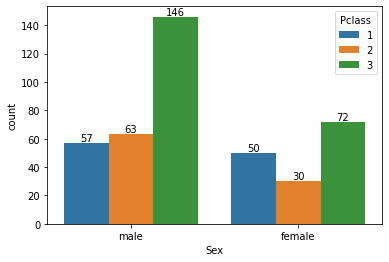

In [26]:
ax = sns.countplot(data=test_df, x='Sex', hue='Pclass')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [27]:
train_df[['Survived','Sex','Pclass']].isnull().sum()

Survived    0
Sex         0
Pclass      0
dtype: int64

In [65]:
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
train_df1=train_df.copy()
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])
#test_df1=test_df.copy()
#test_df1.head()

In [66]:
train_df1[['Sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [67]:
corr=train_df1.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

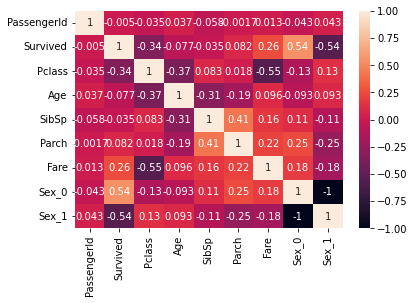

In [53]:
sns.heatmap(corr, annot = True)

In [ ]:
# According to the results we get the following insights about our data:
# 'Survived' and 'Sex' features are nominal categoric variables, 'Pclass' is ordinal categoric variable.
# There are not null values in 'Survived','Sex' and 'Pclass' variables.
# There are 577 men and 314 women in Titanic. 
#There are 184 peoples in Pclass_1 (122 men, 94 women), 216 peoples in Pclass_2 (108 men, 76 women) and 491 peoples in Pclass_3 (347 men, 144 women).
# Thus, majority of people are in Pclass_3.
# From 891 peoples 342 survived (109 men, 233 women), 549 not survuved (468 men, 81 women).
# 74.2 percent of women survived. 18.9 percent of men survived.
# About 63% of peoples survived in Pclass_1. Thus majority of people survived from Pclass_1.
# Most of the women survived, and the majority of the male died.

In [ ]:
#From the above we can say that there is a relationship between {"survived" and "sex"}, {"survived" and "Pclass"}
# For proving it in a scientific way we must test it via statistical tests.

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(pd.crosstab(train_df['Survived'], train_df['Sex']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('There is a relationship between "Survived" and "Sex" (reject H0)')
else:
   print('There is no relationship between "Survived" and "Sex" (H0 holds true)')


p value is 1.1973570627755645e-58
There is a relationship between "Survived" and "Sex" (reject H0)


In [ ]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(train_df['Survived'], train_df['Pclass']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('There is a relationship between "Survived" and "Pclass" (reject H0)')
else:
   print('There is no relationship between "Survived" and "Pclass" (H0 holds true)')

p value is 4.549251711298793e-23
There is a relationship between "Survived" and "Pclass" (reject H0)


In [70]:
train_df1 = pd.get_dummies(train_df, columns=['Sex'])
train_df1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [56]:
test_df1 = pd.get_dummies(test_df, columns=['Sex'])
test_df1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,0


In [ ]:
# According the test result we prove that there is a significant relationship between dependent and independent features.

In [ ]:
# Question 3,4,5

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz,export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate,validation_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

In [47]:
y=train_df1["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
X=train_df1[['Sex_female','Sex_male','Pclass']]
X

,Sex_female,Sex_male,Pclass
0,0,1,3
1,1,0,1
2,1,0,3
3,1,0,1
4,0,1,3
...,...,...,...
886,0,1,2
887,1,0,1
888,1,0,3
889,0,1,1


In [130]:
#CART model
cart_model=DecisionTreeClassifier(random_state=1).fit(X,y) 

In [131]:
y_pred_cart=cart_model.predict(X)
y_pred_cart

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [132]:
y_prob_cart= cart_model.predict_proba(X)[:,1]

In [133]:
y_prob_cart

array([0.13544669, 0.96808511, 0.5       , 0.96808511, 0.13544669,
       0.13544669, 0.36885246, 0.13544669, 0.5       , 0.92105263,
       0.5       , 0.96808511, 0.13544669, 0.13544669, 0.5       ,
       0.92105263, 0.13544669, 0.15740741, 0.5       , 0.5       ,
       0.15740741, 0.15740741, 0.5       , 0.36885246, 0.5       ,
       0.5       , 0.13544669, 0.36885246, 0.5       , 0.13544669,
       0.36885246, 0.96808511, 0.5       , 0.15740741, 0.36885246,
       0.36885246, 0.13544669, 0.13544669, 0.5       , 0.5       ,
       0.5       , 0.92105263, 0.13544669, 0.92105263, 0.5       ,
       0.13544669, 0.13544669, 0.5       , 0.13544669, 0.5       ,
       0.13544669, 0.13544669, 0.96808511, 0.92105263, 0.36885246,
       0.36885246, 0.92105263, 0.13544669, 0.92105263, 0.13544669,
       0.13544669, 0.96808511, 0.36885246, 0.13544669, 0.36885246,
       0.13544669, 0.92105263, 0.13544669, 0.5       , 0.13544669,
       0.15740741, 0.5       , 0.15740741, 0.13544669, 0.13544

In [134]:
print(classification_report(y,y_pred_cart))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       549
           1       0.95      0.47      0.63       342

    accuracy                           0.79       891
   macro avg       0.85      0.73      0.74       891
weighted avg       0.82      0.79      0.77       891



In [189]:
roc_auc_score(y_train,y_prob_cart)

0.8228137166816412

In [151]:
#Hold-out
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=45)

In [152]:
cart_model_tr= DecisionTreeClassifier(random_state=17).fit(X_train,y_train)

In [153]:
y_pred_cart_tr=cart_model.predict(X_train)
y_prob_cart_tr=cart_model.predict_proba(X_train)[:,1]

In [154]:
y_pred_cart_tr

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [155]:
y_prob_cart_tr

array([0.13544669, 0.13544669, 0.13544669, 0.36885246, 0.92105263,
       0.15740741, 0.5       , 0.36885246, 0.13544669, 0.96808511,
       0.5       , 0.13544669, 0.13544669, 0.15740741, 0.36885246,
       0.96808511, 0.13544669, 0.13544669, 0.5       , 0.13544669,
       0.15740741, 0.5       , 0.15740741, 0.13544669, 0.13544669,
       0.5       , 0.13544669, 0.13544669, 0.96808511, 0.96808511,
       0.15740741, 0.13544669, 0.13544669, 0.13544669, 0.5       ,
       0.92105263, 0.13544669, 0.13544669, 0.13544669, 0.36885246,
       0.13544669, 0.13544669, 0.13544669, 0.15740741, 0.13544669,
       0.13544669, 0.36885246, 0.13544669, 0.13544669, 0.5       ,
       0.36885246, 0.13544669, 0.5       , 0.5       , 0.5       ,
       0.5       , 0.36885246, 0.13544669, 0.13544669, 0.96808511,
       0.36885246, 0.15740741, 0.96808511, 0.5       , 0.13544669,
       0.5       , 0.13544669, 0.92105263, 0.96808511, 0.36885246,
       0.5       , 0.13544669, 0.13544669, 0.36885246, 0.13544

In [156]:
print(classification_report(y_train,y_pred_cart_tr))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       371
           1       0.96      0.43      0.60       252

    accuracy                           0.76       623
   macro avg       0.84      0.71      0.71       623
weighted avg       0.81      0.76      0.74       623



In [157]:
roc_auc_score(y_train,y_prob_cart_tr)

0.8228137166816412

In [159]:
y_pred_cart_te=cart_model.predict(X_test)
y_prob_cart_te=cart_model.predict_proba(X_test)[:,1]

In [160]:
print(classification_report(y_test,y_pred_cart_te))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       178
           1       0.93      0.58      0.71        90

    accuracy                           0.84       268
   macro avg       0.87      0.78      0.80       268
weighted avg       0.86      0.84      0.83       268



In [161]:
roc_auc_score(y_test,y_prob_cart_te)

0.8574906367041198

In [162]:
cart_model =DecisionTreeClassifier(random_state=17).fit(X,y)

In [163]:
cv_results_cart=cross_validate(cart_model, X, y, cv=5, scoring=["accuracy","f1","roc_auc"])

In [165]:
cv_results_cart['test_accuracy'].mean()

0.773316176009039

In [166]:
cv_results_cart['test_f1'].mean()

0.6503682116650762

In [167]:
cv_results_cart['test_roc_auc'].mean()

0.8240563463300976

In [ ]:
#Hyperparameter Optimization

In [168]:
cart_params={'max_depth':range(1,20),"min_samples_split":range(2,26)}

In [169]:
cart_best_grid=GridSearchCV(cart_model,cart_params, cv=5,n_jobs=1,verbose=1).fit(X,y)

Fitting 5 folds for each of 456 candidates, totalling 2280 fits


In [170]:
cart_best_grid.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [171]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_,random_state=17).fit(X,y)
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [172]:
cart_final 

DecisionTreeClassifier(max_depth=1, random_state=17)

In [173]:
cv_results = cross_validate(cart_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [174]:
cv_results 

{'fit_time': array([0.00793409, 0.00387621, 0.00366831, 0.00363684, 0.00428271]),
 'score_time': array([0.01228237, 0.00813413, 0.00745249, 0.00743127, 0.00776005]),
 'test_accuracy': array([0.80446927, 0.80337079, 0.78651685, 0.75280899, 0.78651685]),
 'test_f1': array([0.74452555, 0.73684211, 0.71212121, 0.64516129, 0.70769231]),
 'test_roc_auc': array([0.79229249, 0.78756684, 0.76831551, 0.72139037, 0.76452599])}

In [175]:
cv_results['test_accuracy'].mean()

0.7867365513778168

In [176]:
cv_results['test_f1'].mean()

0.7092684925689026

In [177]:
cv_results['test_roc_auc'].mean()

0.7668182422550192

In [178]:
import graphviz
import pydotplus

In [179]:
def tree_graph(model, col_names, file_name):
    tree_str= export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [180]:
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

In [181]:
X_t=test_df1[['Sex_female','Sex_male','Pclass']]
X_t

,Sex_female,Sex_male,Pclass
0,0,1,3
1,1,0,3
2,0,1,2
3,0,1,3
4,1,0,3
...,...,...,...
413,0,1,3
414,1,0,1
415,0,1,3
416,0,1,3


In [186]:
predictions_cart = cart_final.predict(X_t)

In [187]:
predictions_cart

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [188]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission_cart.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [184]:
df=pd.read_csv('submission.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [185]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
#KNN

In [32]:
from sklearn.metrics import classification_report, roc_auc_score

In [33]:
from sklearn.model_selection import GridSearchCV, cross_validate

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.preprocessing import StandardScaler

In [73]:
X,y

(     Sex_female  Sex_male  Pclass
 0             0         1       3
 1             1         0       1
 2             1         0       3
 3             1         0       1
 4             0         1       3
 ..          ...       ...     ...
 886           0         1       2
 887           1         0       1
 888           1         0       3
 889           0         1       1
 890           0         1       3
 
 [891 rows x 3 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [74]:
knn_model= KNeighborsClassifier().fit(X,y)

In [75]:
y_pred_knn=knn_model.predict(X)

In [76]:
y_pred_knn

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [77]:
y_prob_knn=knn_model.predict_proba(X)[:,1]

In [78]:
y_prob_knn

array([0. , 0.8, 0.8, 0.8, 0. , 0. , 0.4, 0. , 0.8, 0.8, 0.8, 0.8, 0. ,
       0. , 0.8, 0.8, 0. , 0.4, 0.8, 0.8, 0.4, 0.4, 0.8, 0.4, 0.8, 0.8,
       0. , 0.4, 0.8, 0. , 0.4, 0.8, 0.8, 0.4, 0.4, 0.4, 0. , 0. , 0.8,
       0.8, 0.8, 0.8, 0. , 0.8, 0.8, 0. , 0. , 0.8, 0. , 0.8, 0. , 0. ,
       0.8, 0.8, 0.4, 0.4, 0.8, 0. , 0.8, 0. , 0. , 0.8, 0.4, 0. , 0.4,
       0. , 0.8, 0. , 0.8, 0. , 0.4, 0.8, 0.4, 0. , 0. , 0. , 0. , 0. ,
       0.4, 0.8, 0. , 0. , 0.8, 0.4, 0.8, 0.8, 0. , 0. , 0.8, 0. , 0. ,
       0. , 0.4, 0. , 0. , 0. , 0.4, 0.4, 0.8, 0.4, 0.8, 0. , 0.4, 0. ,
       0. , 0. , 0.8, 0. , 0. , 0.8, 0.4, 0.8, 0. , 0.8, 0.8, 0. , 0. ,
       0.4, 0.4, 0.8, 0.4, 0. , 0.4, 0.8, 0.4, 0. , 0. , 0. , 0.8, 0. ,
       0. , 0. , 0.8, 0.8, 0.4, 0.4, 0.8, 0.4, 0. , 0.4, 0.8, 0.8, 0.8,
       0. , 0.4, 0.4, 0. , 0.8, 0.4, 0.4, 0.4, 0.8, 0. , 0. , 0. , 0.4,
       0.8, 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0.8, 0.8, 0.4,
       0. , 0.4, 0. , 0.8, 0. , 0.4, 0. , 0. , 0.8, 0.4, 0. , 0.

In [79]:
print(classification_report(y,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



In [80]:
roc_auc_score(y,y_prob_knn) 

0.7953775604767839

In [81]:
cv_results_knn= cross_validate(knn_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])
cv_results_knn

{'fit_time': array([0.00680566, 0.00344896, 0.00343919, 0.00353384, 0.00360012]),
 'score_time': array([0.0189569 , 0.01645041, 0.01678419, 0.01656914, 0.01631522]),
 'test_accuracy': array([0.74860335, 0.73595506, 0.80898876, 0.75280899, 0.78651685]),
 'test_f1': array([0.52631579, 0.69677419, 0.67307692, 0.64516129, 0.70769231]),
 'test_roc_auc': array([0.79347826, 0.78576203, 0.81677807, 0.79304813, 0.81292381])}

In [82]:
cv_results_knn['test_accuracy'].mean()

0.7665746029753311

In [83]:
cv_results_knn['test_f1'].mean()

0.6498041008227766

In [84]:
cv_results_knn['test_roc_auc'].mean()

0.8003980618972758

In [85]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
## Hyperparameter optimazation

In [86]:
knn_model = KNeighborsClassifier()

In [87]:
knn_params = {"n_neighbors":range(2,50)}

In [88]:
knn_gs_best = GridSearchCV(knn_model,knn_params,cv=5,n_jobs=1,verbose=1).fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [89]:
knn_gs_best

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=1)

In [90]:
knn_gs_best.best_params_

{'n_neighbors': 23}

In [91]:
knn_final_model = knn_model.set_params(**knn_gs_best.best_params_).fit(X,y)
knn_final_model

KNeighborsClassifier(n_neighbors=23)

In [92]:
cv_results_knn_final = cross_validate(knn_final_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])
cv_results_knn_final

{'fit_time': array([0.01251197, 0.00730228, 0.00537062, 0.00582337, 0.0189321 ]),
 'score_time': array([0.06238055, 0.03029847, 0.02790308, 0.0426333 , 0.03938103]),
 'test_accuracy': array([0.80446927, 0.80337079, 0.78651685, 0.75280899, 0.78651685]),
 'test_f1': array([0.74452555, 0.73684211, 0.71212121, 0.64516129, 0.70769231]),
 'test_roc_auc': array([0.80922266, 0.81570856, 0.8361631 , 0.83823529, 0.82495679])}

In [93]:
cv_results_knn_final['test_accuracy'].mean()

0.7867365513778168

In [94]:
cv_results_knn_final['test_f1'].mean()

0.7092684925689026

In [95]:
cv_results_knn_final['test_roc_auc'].mean()

0.8248572801858896

In [101]:
predictions_knn = knn_final_model.predict(X_t)

In [102]:
output = pd.DataFrame({'PassengerId': test_df1.PassengerId, 'Pclass': test_df1.Pclass, 'Sex_female': test_df1.Sex_female, 'Sex_male': test_df1.Sex_male, 'Survived': predictions_knn})
output.to_csv('test_df_knn.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [103]:
df_knn_test=pd.read_csv('test_df_knn.csv')
df_knn_test.head()

,PassengerId,Pclass,Sex_female,Sex_male,Survived
0,892,3,0,1,0
1,893,3,1,0,1
2,894,2,0,1,0
3,895,3,0,1,0
4,896,3,1,0,1


In [104]:
df_knn_test['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
#Accepted KNN  model scores:  test_accuracy: 0.787; 
#                             test_f1: 0.709
#                             test_roc_auc=0.825


In [ ]:
#logistic regression model

In [105]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [107]:
log_reg = LogisticRegression()

In [108]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [109]:
y_pred = log_reg.predict(X_test)

In [110]:
print("Accuracy: ", log_reg.score(X_test, y_test))

Accuracy:  0.7821229050279329


In [111]:
y_prob_log=log_reg.predict_proba(X)[:,1]
y_prob_log

array([0.10516941, 0.90051484, 0.60360867, 0.90051484, 0.10516941,
       0.10516941, 0.41129174, 0.10516941, 0.60360867, 0.78780437,
       0.60360867, 0.90051484, 0.10516941, 0.10516941, 0.60360867,
       0.78780437, 0.10516941, 0.22272698, 0.60360867, 0.60360867,
       0.22272698, 0.22272698, 0.60360867, 0.41129174, 0.60360867,
       0.60360867, 0.10516941, 0.41129174, 0.60360867, 0.10516941,
       0.41129174, 0.90051484, 0.60360867, 0.22272698, 0.41129174,
       0.41129174, 0.10516941, 0.10516941, 0.60360867, 0.60360867,
       0.60360867, 0.78780437, 0.10516941, 0.78780437, 0.60360867,
       0.10516941, 0.10516941, 0.60360867, 0.10516941, 0.60360867,
       0.10516941, 0.10516941, 0.90051484, 0.78780437, 0.41129174,
       0.41129174, 0.78780437, 0.10516941, 0.78780437, 0.10516941,
       0.10516941, 0.90051484, 0.41129174, 0.10516941, 0.41129174,
       0.10516941, 0.78780437, 0.10516941, 0.60360867, 0.10516941,
       0.22272698, 0.60360867, 0.22272698, 0.10516941, 0.10516

In [112]:
roc_auc_score(y,y_prob_log)

0.8328353518891338

In [113]:
cv_results_log = cross_validate(log_reg,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])
cv_results_log

{'fit_time': array([0.03495979, 0.03271365, 0.01128364, 0.01182103, 0.00872183]),
 'score_time': array([0.02695155, 0.02759171, 0.00743508, 0.00768638, 0.00736332]),
 'test_accuracy': array([0.80446927, 0.80337079, 0.78651685, 0.75280899, 0.78651685]),
 'test_f1': array([0.74452555, 0.73684211, 0.71212121, 0.64516129, 0.70769231]),
 'test_roc_auc': array([0.83175231, 0.81570856, 0.8453877 , 0.83823529, 0.83393166])}

In [114]:
cv_results_log['test_accuracy'].mean()

0.7867365513778168

In [115]:
cv_results_log['test_f1'].mean()

0.7092684925689026

In [116]:
cv_results_log['test_roc_auc'].mean()

0.8330031028983373

In [117]:
predictions_log = log_reg.predict(X_t)

In [121]:
output = pd.DataFrame({'PassengerId': test_df1.PassengerId, 'Pclass': test_df1.Pclass, 'Sex_female': test_df1.Sex_female, 'Sex_male': test_df1.Sex_male, 'Survived': predictions_log})
output.to_csv('test_df_log.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [122]:
df_log=pd.read_csv('test_df_log.csv')
df_log.head()

,PassengerId,Pclass,Sex_female,Sex_male,Survived
0,892,3,0,1,0
1,893,3,1,0,1
2,894,2,0,1,0
3,895,3,0,1,0
4,896,3,1,0,1


In [123]:
df_log['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [124]:
#Logistic model scores:  test_accuracy: 0.787; 
#                        test_f1: 0.709
#                        test_roc_auc=0.833

In [ ]:
# After the models investigating we can conculude that KNN and Logistic regression model is more appropriate for the creating model based on features 'Sex' and 'Pclass'